# Building a (supervised classification) machine learning model: decision trees

Stages in building a machine learning model:

1. Defining the problem

2. Building the dataset

3. Training the model

4. Evaluating the model

5. Using/Deploying the model

# 1.Defining the problem

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be **SATISFIED** with their services given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience.

# 2. Building the dataset

1. Imports the file and the relevant python libraries for data analysis and machine learning

2. Data cleaning and exploration

3. Feature Engineering where applicable

4. Exploratory data analysis

In [1]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Invistico_Airline.csv")
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
df.satisfaction.unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [4]:
df.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [6]:
df.shape

(129880, 22)

In [7]:
df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [8]:
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [9]:
df['Arrival Delay in Minutes'].fillna(0,inplace=True)

In [10]:
df.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [12]:
df['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [13]:
#This is label encoding, a subset of feature engineering used to transform string data types to numericals
df['level_of_satisfaction'] = df['satisfaction'].map({'satisfied':1,'dissatisfied':0})

In [14]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [15]:
df['customer_type'] = df['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})

In [16]:
df['Type of Travel'].unique()
df['level_of_Travel'] = df['Type of Travel'].map({'Personal Travel':1,'Business travel':0})

In [17]:
df.rename(columns={'level_of_Travel': 'type_of_travel'}, inplace=True)

In [18]:
df['type_of_class'] = df['Class'].map({'Eco':1,'Business':0,'Eco Plus':2})

In [19]:
df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,level_of_satisfaction,customer_type,type_of_travel,type_of_class
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,5,3,2,0,0.0,1,1,1,1
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,4,2,3,2,310,305.0,1,1,1,0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,4,4,4,2,0,0.0,1,1,1,1
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,4,1,3,0,0.0,1,1,1,1
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,4,2,5,0,0.0,1,1,1,1
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,5,5,4,2,0,0.0,1,1,1,1
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,3,17,15.0,1,1,1,1
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,4,5,4,2,0,0.0,1,1,1,1
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,1,5,4,4,0,0.0,1,1,1,0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,5,3,4,2,30,26.0,1,1,1,1


In [20]:
df = df.drop(['satisfaction','Customer Type','Type of Travel','Class'],axis=1)

In [21]:
df.head(10)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,level_of_satisfaction,customer_type,type_of_travel,type_of_class
0,65,265,0,0,0,2,2,4,2,3,...,3,5,3,2,0,0.0,1,1,1,1
1,47,2464,0,0,0,3,0,2,2,3,...,4,2,3,2,310,305.0,1,1,1,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,4,2,0,0.0,1,1,1,1
3,60,623,0,0,0,3,3,4,3,1,...,1,4,1,3,0,0.0,1,1,1,1
4,70,354,0,0,0,3,4,3,4,2,...,2,4,2,5,0,0.0,1,1,1,1
5,30,1894,0,0,0,3,2,0,2,2,...,5,5,4,2,0,0.0,1,1,1,1
6,66,227,0,0,0,3,2,5,5,5,...,5,5,5,3,17,15.0,1,1,1,1
7,10,1812,0,0,0,3,2,0,2,2,...,4,5,4,2,0,0.0,1,1,1,1
8,56,73,0,0,0,3,5,3,5,4,...,1,5,4,4,0,0.0,1,1,1,0
9,22,1556,0,0,0,3,2,0,2,2,...,5,3,4,2,30,26.0,1,1,1,1


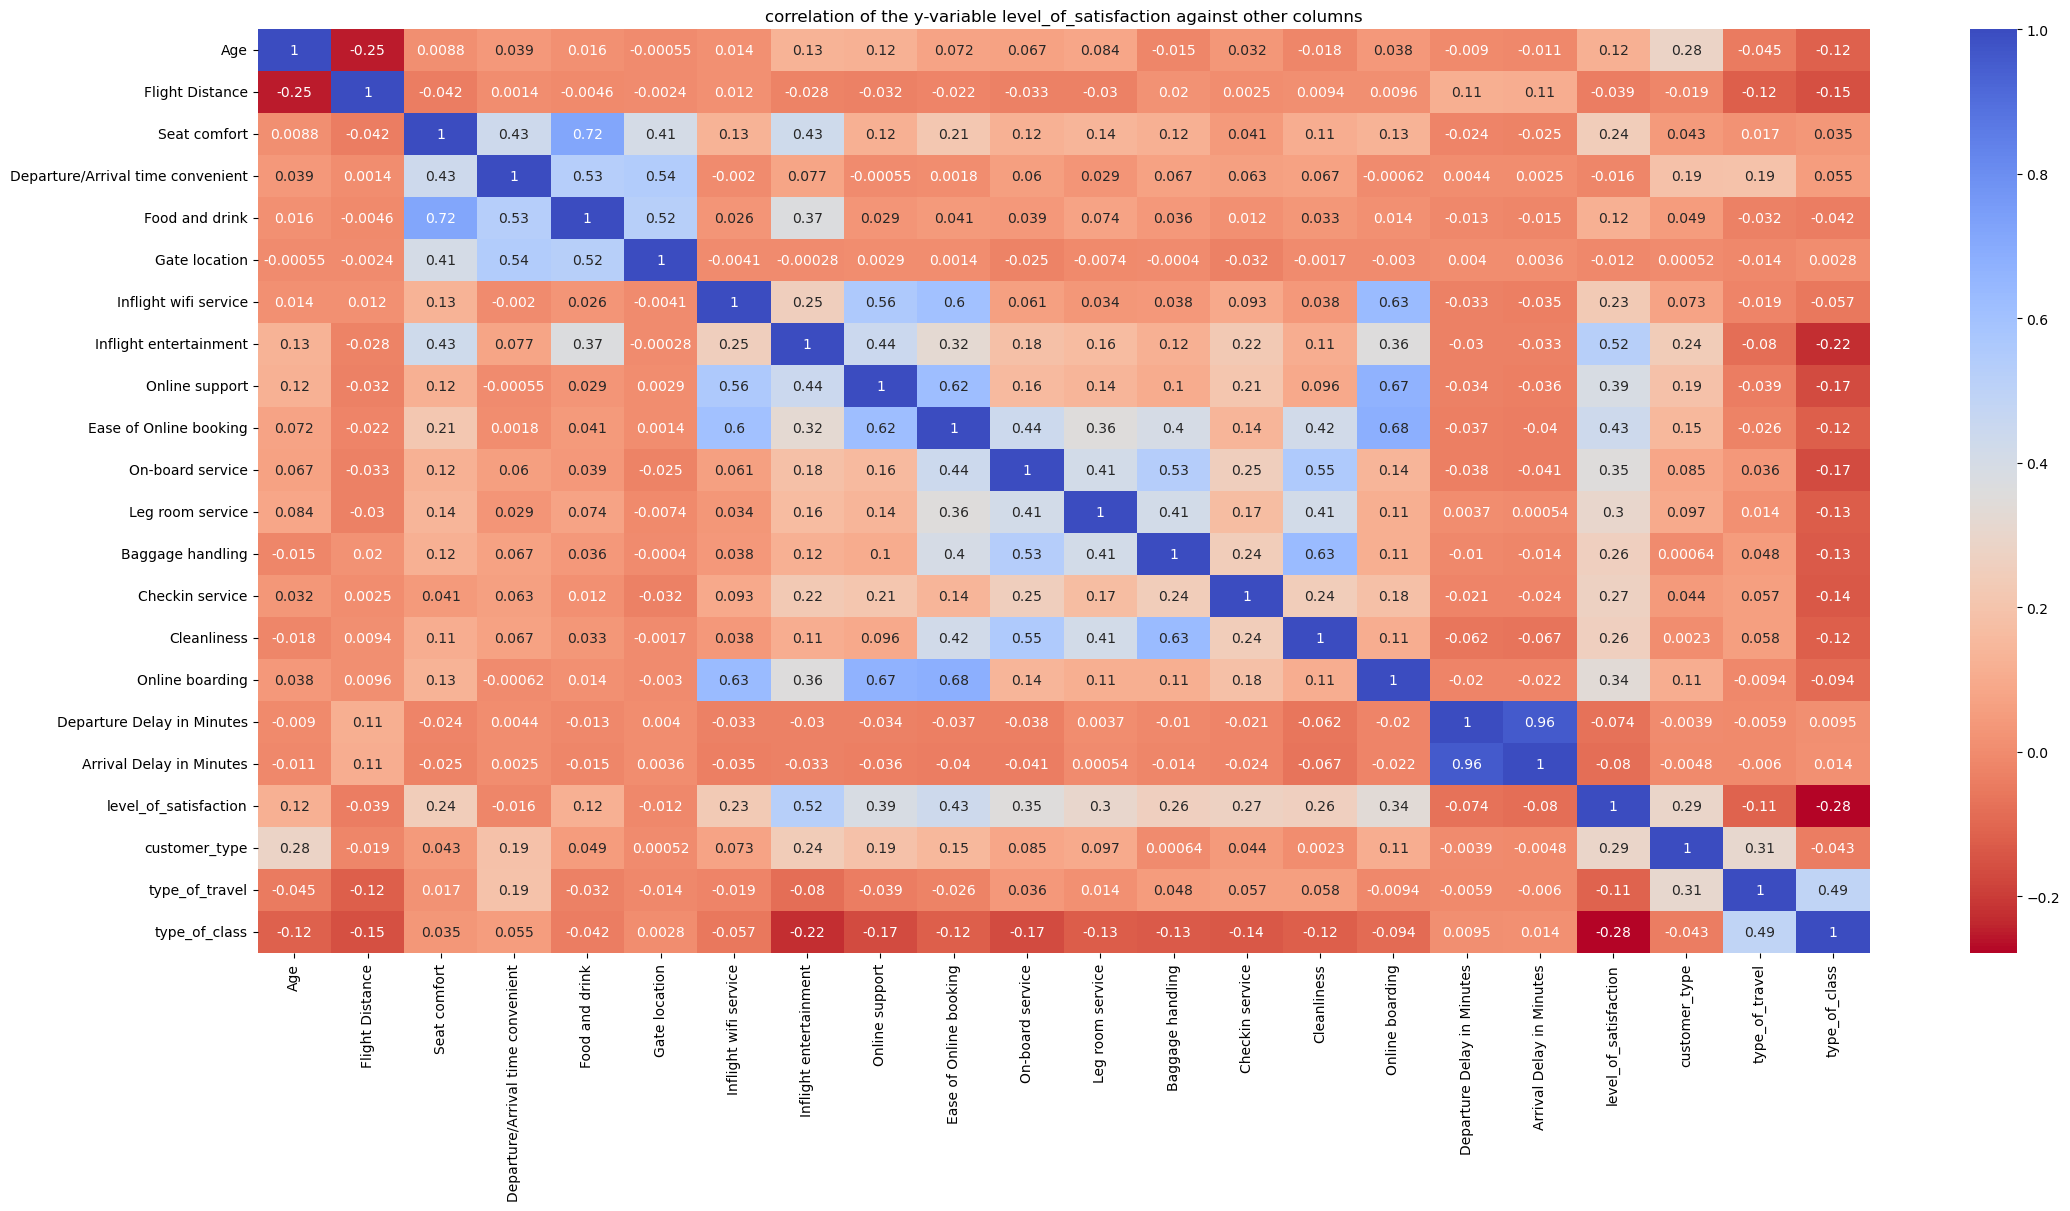

In [22]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(26,12))
corr_heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm_r', ax=ax)
plt.title('correlation of the y-variable level_of_satisfaction against other columns')
plt.show()

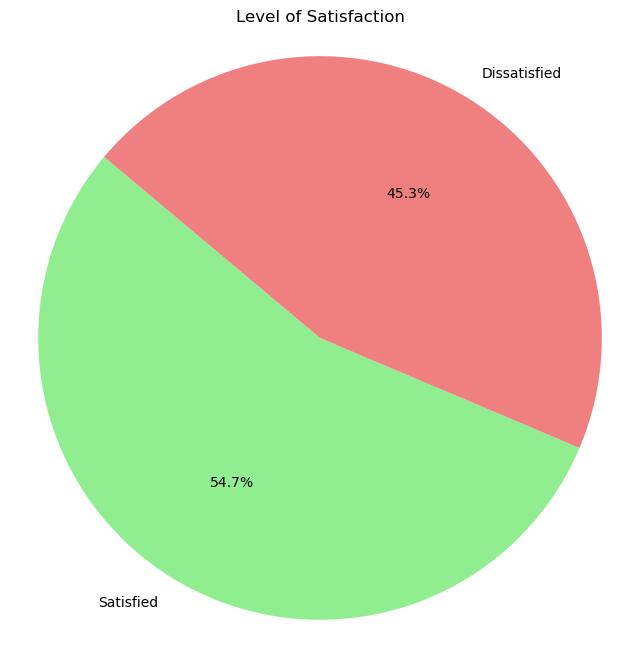

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the given columns

# Count the number of satisfied and dissatisfied customers
satisfied_count = df['level_of_satisfaction'].sum()  # Assuming 1 represents satisfied
dissatisfied_count = len(df) - satisfied_count

# Create labels for the pie chart
labels = ['Satisfied', 'Dissatisfied']

# Create data for the pie chart
sizes = [satisfied_count, dissatisfied_count]

# Create colors for each section of the pie chart
colors = ['lightgreen', 'lightcoral']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Level of Satisfaction')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the pie chart
plt.show()


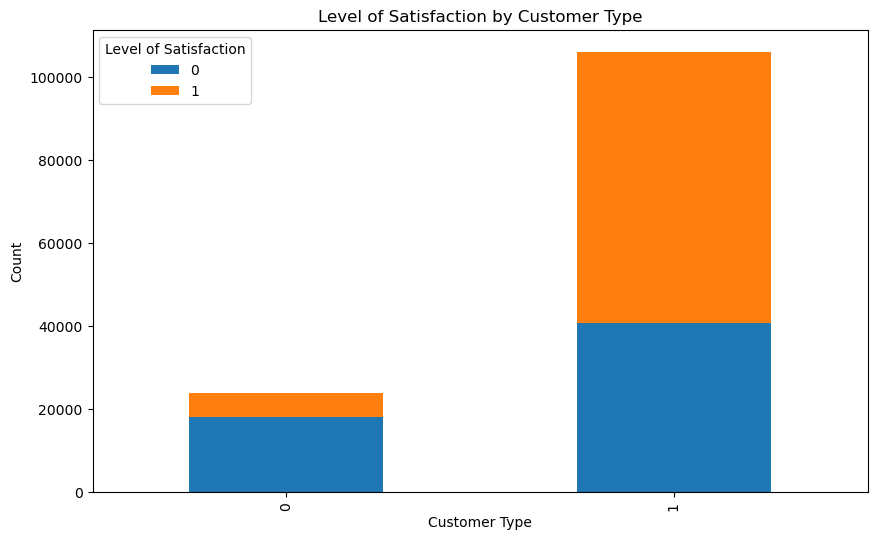

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the given columns

# Group by the 'level_of_satisfaction' column and calculate the count of each category
satisfaction_counts = df.groupby('level_of_satisfaction').size()

# Group by 'customer_type' and 'level_of_satisfaction' and calculate the count of each category
customer_satisfaction_counts = df.groupby(['customer_type', 'level_of_satisfaction']).size().unstack()

# Plot the stacked column chart
customer_satisfaction_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Level of Satisfaction by Customer Type')

# Show the plot
plt.legend(title='Level of Satisfaction')
plt.show()


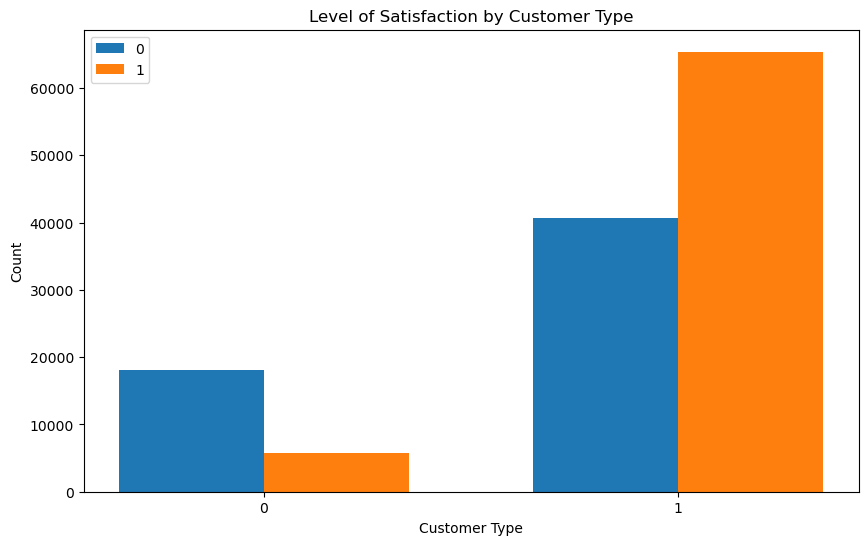

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the given columns

# Group by 'customer_type' and 'level_of_satisfaction' and calculate the count of each category
customer_satisfaction_counts = df.groupby(['customer_type', 'level_of_satisfaction']).size().unstack()

# Get the unique customer types
customer_types = customer_satisfaction_counts.index

# Set the width of each bar
bar_width = 0.35

# Calculate the index for each group
index = np.arange(len(customer_types))

# Plot the grouped column chart
plt.figure(figsize=(10, 6))
for i, satisfaction_level in enumerate(customer_satisfaction_counts.columns):
    plt.bar(index + i * bar_width, customer_satisfaction_counts[satisfaction_level], bar_width, label=satisfaction_level)

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Level of Satisfaction by Customer Type')
plt.xticks(index + bar_width / 2, customer_types)
plt.legend()

# Show the plot
plt.show()


# 3. Model training

## under model traininig:

1. Identify the y and x variables

2. Split the dataset

3. Fit the model

4. Print the results

In [26]:
df.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'level_of_satisfaction', 'customer_type', 'type_of_travel',
       'type_of_class'],
      dtype='object')

In [27]:
y = df["level_of_satisfaction"]

# X = df[['Age', 'Flight Distance', 'Seat comfort',
#        'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
#        'Inflight wifi service', 'Inflight entertainment', 'Online support',
#        'Ease of Online booking', 'On-board service', 'Leg room service',
#        'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
#        'Departure Delay in Minutes', 'Arrival Delay in Minutes',
#         'customer_type', 'type_of_travel',
#        'type_of_class']]

X = df.copy()
X = X.drop("level_of_satisfaction", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

# 4. Model Evaluation

In [29]:
dt_pred = model.predict(X_test)
dt_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [36]:
print(dt_pred[:10])
print(y_test[:10])

[1 0 1 1 0 0 0 1 1 0]
103044    1
43282     0
65543     1
65083     1
76496     0
78319     0
43712     0
8092      1
105253    1
71027     0
Name: level_of_satisfaction, dtype: int64


In [30]:
print("The results of our Decision Tree Model: ")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

The results of our Decision Tree Model: 
Accuracy: 0.936518
Precision: 0.940775
Recall: 0.944130
F1 Score: 0.942449


The accuracy score of 93.7% shows thst our model is 93.7% accurate in predicting the satisfaction level of customers. We can go ahead and deploy the model.